<h1 style="text-align: center; color: #FF0000; background-color: #000000; padding: 10px;">Linear Regression Case Study - Insurance</h1>


In [1]:
# Import the Following Libraries

import matplotlib.pyplot as plt

import matplotlib
from matplotlib import pyplot as plt

import pandas as pd
import seaborn as sns
import scipy
import numpy as np

In [2]:
# To Supress the Warning
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
# Loading the Dataset
df=pd.read_csv('healthinsurance.csv')
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


# Set Options

In [ ]:
#To SHow all the columns & Rows:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Get dimensions
dimensions = df.shape

print("Pandas DataFrame dimensions:", dimensions)

Pandas DataFrame dimensions: (15000, 13)


# Data Analysis and Preparations:

In [5]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

# Changing the Incorrect Data Types

In [4]:
df['sex'] = df['sex'].astype('category') 
df['hereditary_diseases'] = df['hereditary_diseases'].astype('category')
df['city'] = df['city'].astype('category')
df['bloodpressure'] = df['bloodpressure'].astype('int64')
df['diabetes'] = df['diabetes'].astype('int64')
df['regular_ex'] = df['regular_ex'].astype('int64')
df['job_title'] = df['job_title'].astype('category')
df['claim'] = df['claim'].astype('int64')

# Sanity check for the Incorrect Data Types

Missing Values Information:
                     Total Missing  Percentage Missing
age                            396                2.64
sex                              0                0.00
weight                           0                0.00
bmi                            956                6.37
hereditary_diseases              0                0.00
no_of_dependents                 0                0.00
smoker                           0                0.00
city                             0                0.00
bloodpressure                    0                0.00
diabetes                         0                0.00
regular_ex                       0                0.00
job_title                        0                0.00
claim                            0                0.00


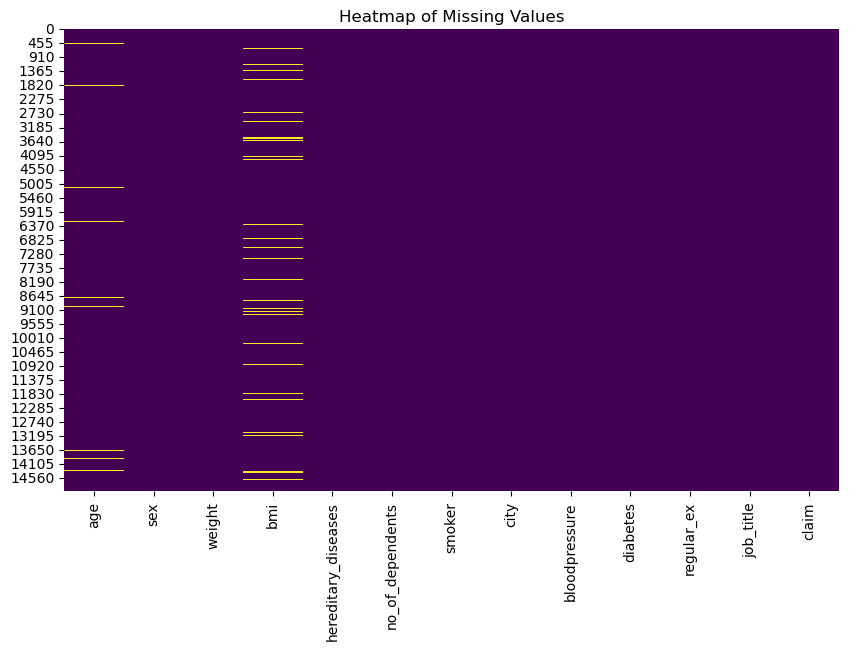

In [5]:
# Calculate missing values
missing_values = df.isnull().sum()

# Calculate percentage of missing values
total_cells = df.size
total_missing = missing_values.sum()
percentage_missing = (total_missing / total_cells) * 100

# Create a DataFrame to display the results
missing_info = pd.concat([missing_values, (missing_values / len(df) * 100).round(2)], axis=1)
missing_info.columns = ['Total Missing', 'Percentage Missing']

print("Missing Values Information:")
print(missing_info)

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

# Summary Statistics for (both Numerical and Categorical Columns)

In [5]:
df.describe(include='all')

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
count,14604.000000,15000,15000.000000,14044.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,2,NaN,NaN,10,NaN,NaN,91,NaN,NaN,NaN,35,NaN
top,NaN,female,NaN,NaN,NoDisease,NaN,NaN,NewOrleans,NaN,NaN,NaN,Student,NaN
freq,NaN,7652,NaN,NaN,13998,NaN,NaN,302,NaN,NaN,NaN,1320,NaN
mean,39.547521,NaN,64.909600,30.266413,NaN,1.129733,0.198133,NaN,68.650133,0.777000,0.224133,NaN,13400.989133
std,14.015966,NaN,13.701935,6.122950,NaN,1.228469,0.398606,NaN,19.418515,0.416272,0.417024,NaN,12148.237559
min,18.000000,NaN,34.000000,16.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1121.000000
25%,27.000000,NaN,54.000000,25.700000,NaN,0.000000,0.000000,NaN,64.000000,1.000000,0.000000,NaN,4846.000000
50%,40.000000,NaN,63.000000,29.400000,NaN,1.000000,0.000000,NaN,71.000000,1.000000,0.000000,NaN,9545.000000
75%,52.000000,NaN,76.000000,34.400000,NaN,2.000000,0.000000,NaN,80.000000,1.000000,0.000000,NaN,16519.000000


In [6]:
# Handling missing values for age column by filling with mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Handling missing values for bmi column by filling with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Sanity Check

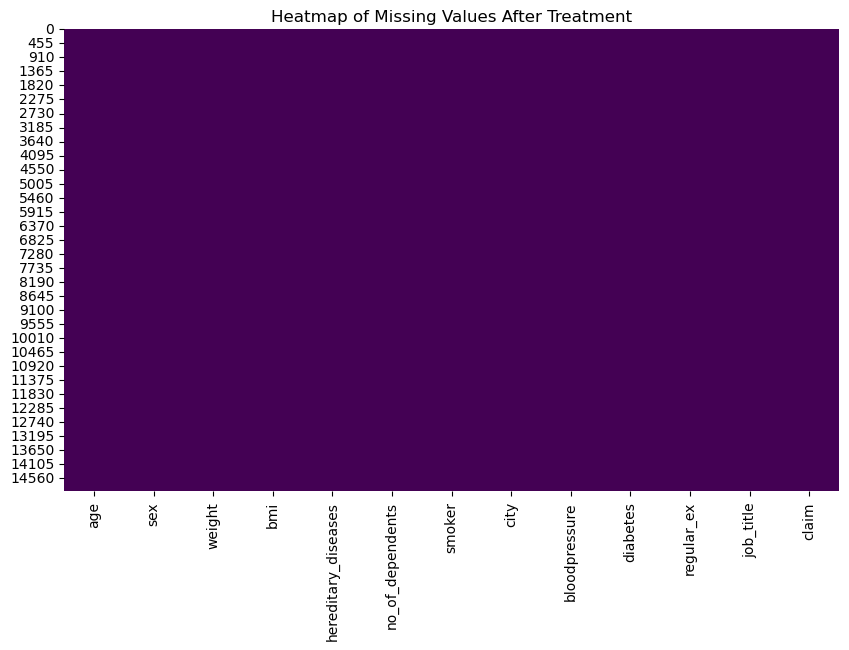

In [9]:
# Creating a heatmap of missing values after treatment
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values After Treatment')
plt.show()

# Pearson’s Correlation

In [20]:
# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating Pearson's correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Display the correlation matrix
print("Pearson's Correlation for Numeric Data:")
print(correlation_matrix)

Pearson's Correlation for Numeric Data:
                       age    weight       bmi  no_of_dependents    smoker  \
age               1.000000  0.281228  0.180123          0.058926 -0.019417   
weight            0.281228  1.000000  0.243269          0.135687  0.015499   
bmi               0.180123  0.243269  1.000000          0.049704  0.022802   
no_of_dependents  0.058926  0.135687  0.049704          1.000000  0.008364   
smoker           -0.019417  0.015499  0.022802          0.008364  1.000000   
bloodpressure    -0.008225 -0.020835 -0.040066          0.024849  0.005709   
diabetes          0.069598 -0.010490  0.079066          0.065182  0.058164   
regular_ex        0.008448 -0.005578 -0.037920         -0.010302 -0.036949   
claim             0.298360  0.077716  0.197940          0.067614  0.773398   

                  bloodpressure  diabetes  regular_ex     claim  
age                   -0.008225  0.069598    0.008448  0.298360  
weight                -0.020835 -0.010490   -0.

# Set of Analysing Categorical Columns with Appropriate Plotting, with inferences

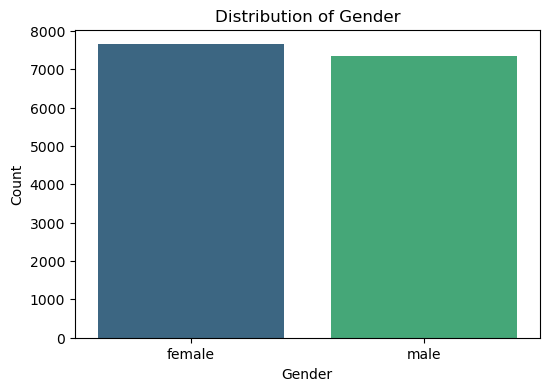

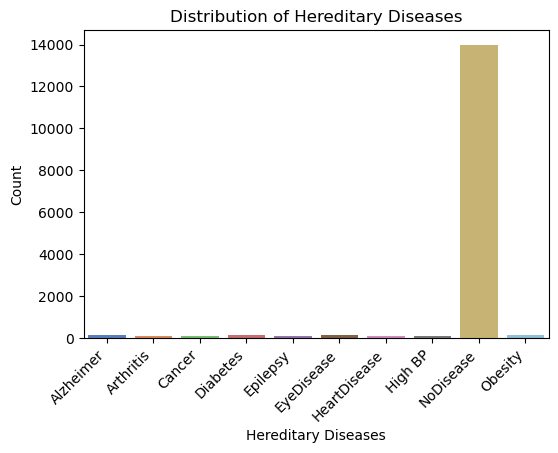

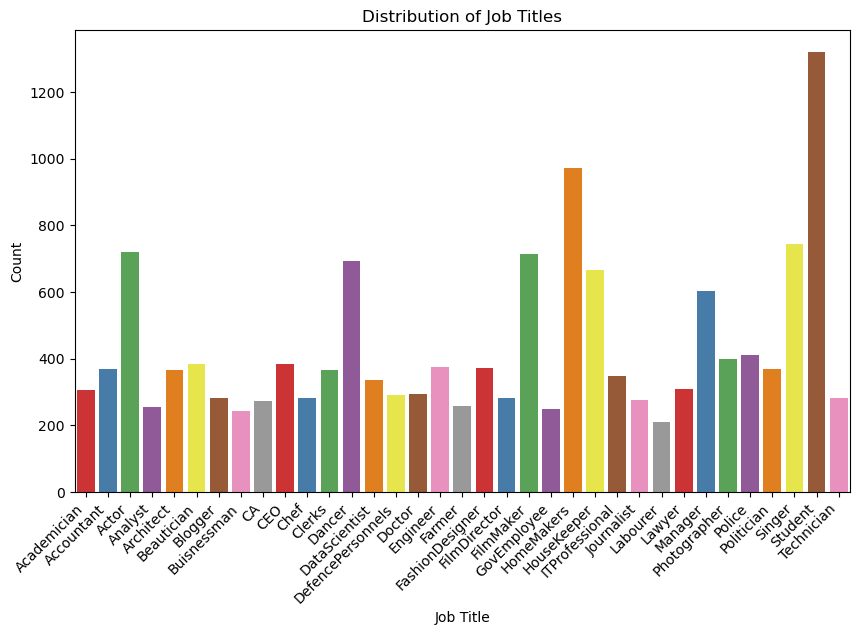

In [32]:
# Bar plot for 'sex' column
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for 'hereditary_diseases' column
plt.figure(figsize=(6, 4))
sns.countplot(x='hereditary_diseases', data=df, palette='muted')
plt.title('Distribution of Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Bar plot for 'job_title' column
plt.figure(figsize=(10, 6))
sns.countplot(x='job_title', data=df, palette='Set1')
plt.title('Distribution of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="background-color: black; color: yellow; padding: 10px;">
    <h2>Analyzing the Relationship Between Target and Categorical Variables</h2>
</div>

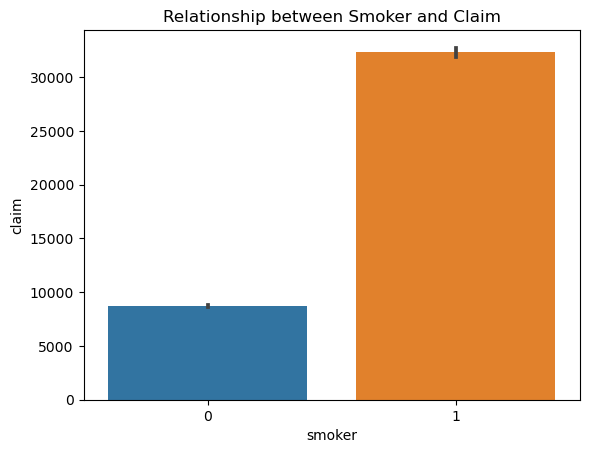

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.barplot(x="smoker", y="claim", data=df)
plt.title("Relationship between Smoker and Claim")
plt.show()

## Statistical tests to assess whether there are significant differences in the claims across different categories. Common tests include chi-squared test for independence or ANOVA

In [10]:
from scipy.stats import chi2_contingency

# Example with 'smoker' and 'claim'
contingency_table = pd.crosstab(df['smoker'], df['claim'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check p-value to determine significance
if p < 0.05:
    print("There is a significant relationship between smoker and claim.")
else:
    print("There is no significant relationship between smoker and claim.")

There is a significant relationship between smoker and claim.


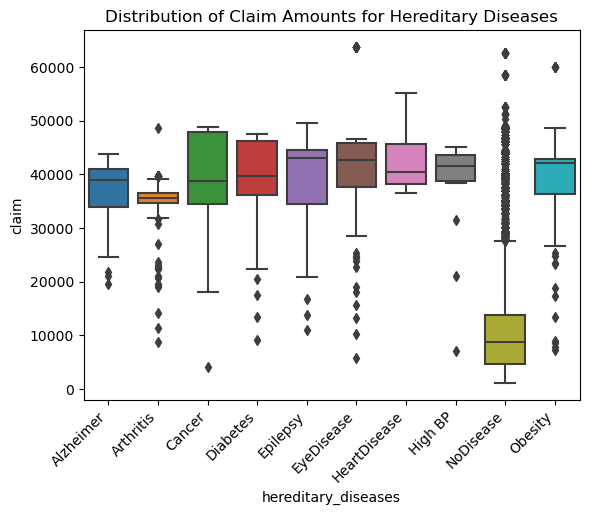

In [8]:
sns.boxplot(x="hereditary_diseases", y="claim", data=df)
plt.title("Distribution of Claim Amounts for Hereditary Diseases")
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="background-color: green; color: orange; padding: 10px;">
    <h1>Featuring with loaded Information about the Dataset</h1>
</div>

In [10]:
# Display the first few rows of the DataFrame
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731


In [9]:
# Check for missing values
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [11]:
df['city']

0            NewYork
1             Boston
2        Phildelphia
3          Pittsburg
4            Buffalo
            ...     
14995       Florence
14996          Miami
14997          Tampa
14998     PanamaCity
14999      Kingsport
Name: city, Length: 15000, dtype: category
Categories (91, object): ['Atlanta', 'AtlanticCity', 'Bakersfield', 'Baltimore', ..., 'Waterloo', 'Worcester', 'York', 'Youngstown']

# Function to categorize cities

In [7]:
def categorize_region(city):
    north_cities = ["NewYork", "Boston", "Buffalo", "Syracuse", "Hartford", "Providence", "Harrisburg", "Newport", "Stamford", "Worcester"]
    south_cities = ["Atlanta", "Birmingham", "Charleston", "Charlotte", "Louisville", "Memphis", "Nashville", "NewOrleans", "Raleigh", "Houston", "Orlando", "Miami", "Tampa"]
    east_cities = ["WashingtonDC", "Philadelphia", "Pittsburgh", "AtlanticCity", "Portland", "Cambridge", "Baltimore", "York", "Trenton", "Warwick"]
    west_cities = ["LosAngeles", "SanFrancisco", "SanJose", "SanDiego", "Oceanside", "Carlsbad", "Phoenix", "Denver"]

    if city in north_cities:
        return 'North'
    elif city in south_cities:
        return 'South'
    elif city in east_cities:
        return 'East'
    elif city in west_cities:
        return 'West'
    else:
        return None

# Apply the categorize_region function to create a new 'Region' column
df['Region'] = df['city'].apply(categorize_region)

# Display the updated DataFrame
print(df)

        age     sex  weight   bmi hereditary_diseases  no_of_dependents  \
0      60.0    male      64  24.3           NoDisease                 1   
1      49.0  female      75  22.6           NoDisease                 1   
2      32.0  female      64  17.8            Epilepsy                 2   
3      61.0  female      53  36.4           NoDisease                 1   
4      19.0  female      50  20.6           NoDisease                 0   
...     ...     ...     ...   ...                 ...               ...   
14995  39.0    male      49  28.3           NoDisease                 1   
14996  39.0    male      74  29.6           NoDisease                 4   
14997  20.0    male      62  33.3           NoDisease                 0   
14998  52.0    male      88  36.7           NoDisease                 0   
14999  52.0    male      57  26.4           NoDisease                 3   

       smoker         city  bloodpressure  diabetes  regular_ex  \
0           0      NewYork      

# Drop the original 'City' column in-place

In [8]:
df.drop('city', axis=1, inplace=True)

# Updated Dataset Called Region

In [41]:
df

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim,Region
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,Actor,13112,North
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,Engineer,9567,North
2,32.0,female,64,17.8,Epilepsy,2,1,88,1,1,Academician,32734,None
3,61.0,female,53,36.4,NoDisease,1,1,72,1,0,Chef,48517,None
4,19.0,female,50,20.6,NoDisease,0,0,82,1,0,HomeMakers,1731,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,54,1,0,FilmMaker,21082,None
14996,39.0,male,74,29.6,NoDisease,4,0,64,1,0,Student,7512,South
14997,20.0,male,62,33.3,NoDisease,0,0,52,1,0,FashionDesigner,1391,South
14998,52.0,male,88,36.7,NoDisease,0,0,70,1,0,Farmer,9144,None


In [9]:
# Calculate the total claim amount for each region
region_claim_totals = df.groupby('Region')['claim'].sum().sort_values(ascending=False)
region_claim_totals

Region
South    38116276.9
North    27779564.0
West     14621598.7
East     12736814.4
Name: claim, dtype: float64

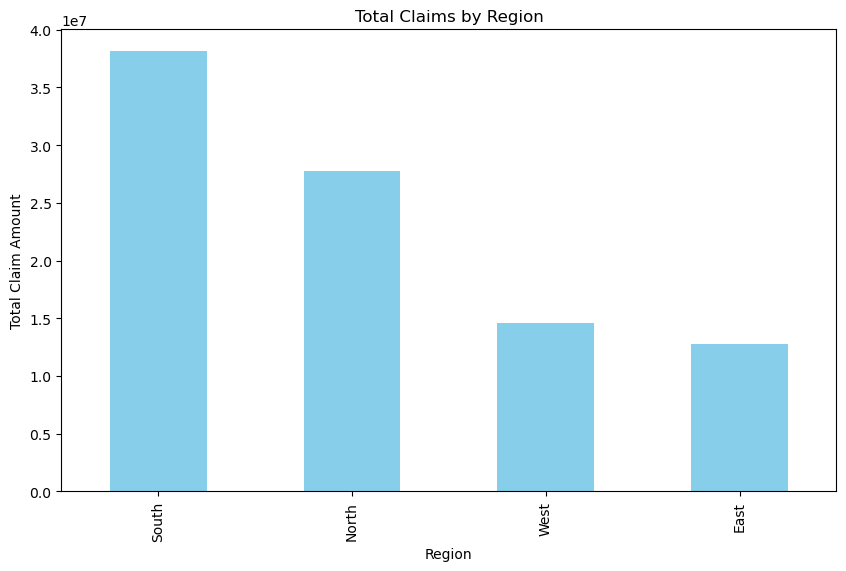

In [44]:
# Create a bar chart
plt.figure(figsize=(10, 6))
region_claim_totals.plot(kind='bar', color='skyblue')
plt.title('Total Claims by Region')
plt.xlabel('Region')
plt.ylabel('Total Claim Amount')
plt.show()

<div style="background-color: #00ff00; color: #000000; padding: 10px;">
    <h2>Interpretation</h2>
    <p>The bar chart provides a clear depiction, highlighting that the Southern region in the United States stands out with the highest recorded insurance claims.</p>
</div>

In [10]:
df_category = df.select_dtypes(include = 'object')



df_numerical = df.select_dtypes(exclude = 'object')


In [11]:
for col in df_category.columns.values:
    dummy_variables = pd.get_dummies(df_category[col],
                                    prefix=col,drop_first=True)
    
    #Concatenate the cateogry feature with dummy variables using concat
    df_category = pd.concat([df_category,dummy_variables],axis= 1)
    
    #Drop the Original Categorical Variable from the Data frame
    df_category.drop([col],axis=1,inplace= True)

In [12]:
# Concatenate Numerical and Dummy Encoded Categorical Variables

df_insurance_dummy = pd.concat([df_numerical,df_category],axis=1)
df_insurance_dummy.head()


,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,Region_North,Region_South,Region_West
0,60.0,64,24.3,1,0,72,0,0,13112.6,True,...,False,False,False,False,False,False,False,True,False,False
1,49.0,75,22.6,1,0,78,1,1,9567.0,False,...,False,False,False,False,False,False,False,True,False,False
2,32.0,64,17.8,2,1,88,1,1,32734.2,False,...,False,False,False,False,False,False,False,False,False,False
3,61.0,53,36.4,1,1,72,1,0,48517.6,False,...,False,False,False,False,False,False,False,False,False,False
4,19.0,50,20.6,0,0,82,1,0,1731.7,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
Region                  object
dtype: object

In [14]:
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split

In [15]:
df_insurance_dummy = sm.add_constant(df_insurance_dummy)

In [33]:
# Separate the Independent and Dependent Variable 
x_train_significant = df_insurance_dummy.loc[:, df_insurance_dummy.columns != 'claim']
x_train_significant

,const,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,sex_male,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,Region_North,Region_South,Region_West
0,1.0,60.0,64,24.3,1,0,72,0,0,True,...,False,False,False,False,False,False,False,True,False,False
1,1.0,49.0,75,22.6,1,0,78,1,1,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,32.0,64,17.8,2,1,88,1,1,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,61.0,53,36.4,1,1,72,1,0,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,19.0,50,20.6,0,0,82,1,0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.0,39.0,49,28.3,1,1,54,1,0,True,...,False,False,False,False,False,False,False,False,False,False
14996,1.0,39.0,74,29.6,4,0,64,1,0,True,...,False,False,False,False,False,True,False,False,True,False
14997,1.0,20.0,62,33.3,0,0,52,1,0,True,...,False,False,False,False,False,False,False,False,True,False
14998,1.0,52.0,88,36.7,0,0,70,1,0,True,...,False,False,False,False,False,False,False,False,False,False


In [21]:
y = df_insurance_dummy['claim']
y

0        13112.6
1         9567.0
2        32734.2
3        48517.6
4         1731.7
          ...   
14995    21082.2
14996     7512.3
14997     1391.5
14998     9144.6
14999    25992.8
Name: claim, Length: 15000, dtype: float64

In [39]:
x_train_significant = x_train_significant.apply(pd.to_numeric, errors='coerce')

In [41]:
print(x_train_significant.dtypes)

const                               float64
age                                 float64
weight                                int64
bmi                                 float64
no_of_dependents                      int64
smoker                                int64
bloodpressure                         int64
diabetes                              int64
regular_ex                            int64
sex_male                               bool
hereditary_diseases_Arthritis          bool
hereditary_diseases_Cancer             bool
hereditary_diseases_Diabetes           bool
hereditary_diseases_Epilepsy           bool
hereditary_diseases_EyeDisease         bool
hereditary_diseases_HeartDisease       bool
hereditary_diseases_High BP            bool
hereditary_diseases_NoDisease          bool
hereditary_diseases_Obesity            bool
job_title_Accountant                   bool
job_title_Actor                        bool
job_title_Analyst                      bool
job_title_Architect             

In [36]:
print(x_train_significant.isnull().sum())

const                               0
age                                 0
weight                              0
bmi                                 0
no_of_dependents                    0
smoker                              0
bloodpressure                       0
diabetes                            0
regular_ex                          0
sex_male                            0
hereditary_diseases_Arthritis       0
hereditary_diseases_Cancer          0
hereditary_diseases_Diabetes        0
hereditary_diseases_Epilepsy        0
hereditary_diseases_EyeDisease      0
hereditary_diseases_HeartDisease    0
hereditary_diseases_High BP         0
hereditary_diseases_NoDisease       0
hereditary_diseases_Obesity         0
job_title_Accountant                0
job_title_Actor                     0
job_title_Analyst                   0
job_title_Architect                 0
job_title_Beautician                0
job_title_Blogger                   0
job_title_Buisnessman               0
job_title_CA

In [42]:
# Convert boolean columns to numeric (0 and 1)
bool_columns = x_train_significant.select_dtypes(include='bool').columns
x_train_significant[bool_columns] = x_train_significant[bool_columns].astype(int)

# Fit the linear regression model
linear_model = sm.OLS(y_train, x_train_significant).fit()

# Print the summary
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     885.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:49:49   Log-Likelihood:            -1.5149e+05
No. Observations:               15000   AIC:                         3.031e+05
Df Residuals:                   14944   BIC:                         3.035e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

# Jarque-Bera (JB) test

In [54]:
from scipy.stats import jarque_bera

# Assuming 'column_name' is the column for which you want to perform the test
data_column = df['claim']

# Perform Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(data_column)

# Display the results
print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"P-value: {jb_p_value}")

# Check the hypothesis
if jb_p_value < 0.05:
    print("Reject the null hypothesis. Data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. Data is normally distributed.")


Jarque-Bera test statistic: 6956.652395448128
P-value: 0.0
Reject the null hypothesis. Data is not normally distributed.


In [55]:
import numpy as np

# Logarithmic transformation
log_data = np.log1p(data_column)

# Perform Jarque-Bera test on the transformed data
log_jb_stat, log_jb_p_value = jarque_bera(log_data)

# Display the results
print(f"Jarque-Bera test statistic after logarithmic transformation: {log_jb_stat}")
print(f"P-value after logarithmic transformation: {log_jb_p_value}")

# Check the hypothesis
if log_jb_p_value < 0.05:
    print("Reject the null hypothesis. Transformed data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. Transformed data is normally distributed.")

Jarque-Bera test statistic after logarithmic transformation: 241.66253451046228
P-value after logarithmic transformation: 3.339238120900388e-53
Reject the null hypothesis. Transformed data is not normally distributed.


In [56]:
from scipy.stats import boxcox

# Perform Box-Cox transformation
transformed_data, lambda_value = boxcox(data_column)

# Perform Jarque-Bera test on the transformed data
boxcox_jb_stat, boxcox_jb_p_value = jarque_bera(transformed_data)

# Display the lambda value
print(f"Optimal lambda value for Box-Cox transformation: {lambda_value}")

# Display the results
print(f"Jarque-Bera test statistic after Box-Cox transformation: {boxcox_jb_stat}")
print(f"P-value after Box-Cox transformation: {boxcox_jb_p_value}")

# Check the hypothesis
if boxcox_jb_p_value < 0.05:
    print("Reject the null hypothesis. Transformed data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. Transformed data is normally distributed.")

Optimal lambda value for Box-Cox transformation: 0.03788765575746612
Jarque-Bera test statistic after Box-Cox transformation: 238.3887474604312
P-value after Box-Cox transformation: 1.7160945617712066e-52
Reject the null hypothesis. Transformed data is not normally distributed.


In [51]:
from scipy.stats import f_oneway

# Assuming 'claim' is the column for which you want to perform the test
data_column = df['claim']

# Assuming 'region' is the categorical column for grouping
grouped_data = [data_column[df['Region'] == group] for group in df['Region'].unique()]

# Perform one-way ANOVA
f_statistic, anova_p_value = f_oneway(*grouped_data)

# Display the results of ANOVA
print(f"One-way ANOVA F-statistic: {f_statistic}")
print(f"P-value: {anova_p_value}")

# Check the hypothesis for ANOVA
if anova_p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences in claim means between groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences in claim means between groups.")


One-way ANOVA F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There are no significant differences in claim means between groups.
